In [2]:
from myst_nb import glue

bare_settings = 'nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu'
def gen_desmos_iframe(url,args,width,height):
    return """<iframe src={} width="{}" height="{}" frameborder=0></iframe>""".format(url+'?'+args,width,height)

# Convolution

(sum-conv-interp)=
```{admonition} Summary

*Convolution* is a fundamental operation that takes in two functions $f,g$ and outputs a third one. Because it is so fundamental, it appears in a huge number of mathematical and scientific contexts. It can be understood in two related ways: 

- **Generalized blurring** At each point in $f$, localized information is spread out according to the "blurring template" $g$. 
- **Sliding dot product** $g$ is shifted left to right over $f$, and the dot product of the two is computed as a function of the shift. 

``` 

(subsec-conv-def)=
### Definition

We'll start by deriving the expression for the convolution of two functions following the two interpretations above. 

In [3]:
url = 'https://www.desmos.com/calculator/jqwlmzly1e'
gen_desmos_iframe(url,bare_settings,750,300)

'<iframe src=https://www.desmos.com/calculator/jqwlmzly1e?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="750" height="300" frameborder=0></iframe>'

::::::{tab-set}

:::::{tab-item} Generalized blurring

How do we mathematically express the idea of [generalized blurring](sum-conv-interp)? Play with the value $t$ and the template (round/sharp) below to build some intuition. It should be clear that blurring the red function $f(x)$ by the purple template $g(x)$ should replace the narrow spikes in $f(x)$ with wide bumps (upper blue trace). 

<center><iframe src=https://www.desmos.com/calculator/ichflnfagz?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="600" height="350" frameborder=0></iframe></center>

::::{grid} 2
:gutter: 3

:::{grid-item-card}  Inputs
:columns: 4
:text-align: center
$f(x),g(x)$
:::
:::{grid-item-card} 
:columns: 8
We define the "base" function to be blurred (red), and the "blurring template", which describes how points will spread out (purple). 
:::


:::{grid-item-card}  Shift template
:columns: 4
:text-align: center
$g(x-t)$
:::
:::{grid-item-card} 
:columns: 8
To compute the effect of the blur at argument $t$, we first shift the template to that $t$ value (green).
:::


:::{grid-item-card}  Weight template
:text-align: center
:columns: 4
$f(t)g(x-t)$
:::
:::{grid-item-card} 
:columns: 8
The template at $t$ is weighted by the base function (orange).
:::

:::{grid-item-card}  Combine
:text-align: center
:columns: 4
$\int f(t)g(x-t) dt$
:::
:::{grid-item-card} 
:columns: 8
We combine the spread-out information for all points $t$, which gives the convolution (blue). 
:::
::::

:::::



:::::{tab-item} Sliding dot product

How do we mathematically express the idea of a [sliding dot product](sum-conv-interp)? The operation should take in two functions, $f(t)$ and $g(t)$, and return a new function $f*g$ that records the dot product of $f$ and $g$ at all possible relative shifts. It's important to keep in mind that while $f$ and $g$ are functions of a variable $t$, the convolution $f*g$ *is effectively a function of a new variable*, the shift, which we'll call $x$. 

Play with the demo below to build intuition. It should be clear that when computing the convolution of $f$ (red) and $g$ (purple), the dot product should be high when they overlap, and nearly $0$ when they don't (blue). 

<center><iframe src=https://www.desmos.com/calculator/tkmpo7ffa6?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="600" height="300" frameborder=0></iframe></center>

::::{grid} 2
:gutter: 3

:::{grid-item-card}  Inputs
:columns: 4
:text-align: center
$f(t), g(t)$
:::
:::{grid-item-card} 
:columns: 8
We define the two functions to be convolved (red, purple). 
:::

:::{grid-item-card}  Flip
:columns: 4
:text-align: center
$g(-t)$
:::
:::{grid-item-card} 
:columns: 8
We flip the second function left-right. (This is a convention that should become clearer below.)
:::

:::{grid-item-card}  Shift
:columns: 4
:text-align: center
$g(x-t)$
:::
:::{grid-item-card} 
:columns: 8
To compute the convolution at $x$, we shift the second function by $x$ (green).
:::

:::{grid-item-card} Dot product
:text-align: center
:columns: 4
$\int f(t)g(x-t)dt$
:::
:::{grid-item-card} 
:columns: 8
We multiply the functions and integrate (blue region), giving the convolution (plotted for all $x$ values above in blue). 
:::
::::

:::::


::::::

Thus we've arrived at the following definition for the convolution of two functions. There is also an analogous concept of the discrete convolution of two vectors, which works in more or less the exact same way, and can be understood in terms of the same two interpretations given above.  

:::{admonition} Definition
:class: note
:label: def-conv-cont
The **convolution** of two functions $f$ and $g$, written $f*g$ is a function defined by
```{math}
f*g(x) = \int f(t)g(x-t) dt
:::

:::{admonition} Definition
:class: note
The **discrete convolution** of two $n$-dimensional vectors $v$ and $w$ with components $v_i,w_i$ for $i=0,1,\ldots,n-1$, is a new $n$-dimensional vector $p$ with components
```{math}
p_j = \sum_{i=0}^{n-1} v_i w_{j-i}
:::

### Examples

Convolution is such an important topic because of the wide range of contexts where it is natural and/or useful. In this section we'll give several exampes, explaining how each can be understood as a convolution according to one of the two [interpretations](sum-conv-interp) above. 

(ex-image-blurring)=
#### Image blurring

Given that convolution can be thought of as a form of [generalized blurring](sum-conv-interp), it should come as no susprise that it can be used to model... blurring. The section {ref}`subsec-conv-def` provides a $1$-dimensional example, and things work analogously in the context of a 2-dimensional image. To model the process of image blurring, we begin with an uncorrupted image:

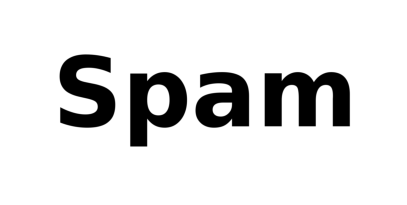

In [2]:
# %matplotlib inline
import matplotlib.pyplot as plt

im = plt.imread('./figs/spam.png').mean(2)

plt.figure(figsize=(5,4))
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()

Next, we specify a blurring function, which describes how localized information in the image will spread out in 2-dimensions. In this case, we'll choose a *gaussian blurring function*, which smoothly spreads information out in all directions equally.

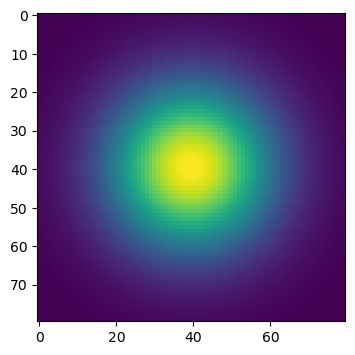

In [4]:
import numpy as np
   
# Function for creating gaussian filters
def make_gaussian_filter(l=5, σ=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `σ`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * ax**2 / σ**2 )
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

# Make our particular filter
filt = make_gaussian_filter(80,15)

plt.figure(figsize=(4,4))
plt.imshow(filt)
plt.show()

You can see that information is spread out by roughly $20$ pixels in each direction. 

Next, we convolve the image and filter - in effect, each pixel in the image is spread out in the pattern above. We can accomplish this using `convolve2d` in the `scipy.signal` module. 

In [5]:
from scipy.signal import convolve2d

im_blur = convolve2d(im,filt,fillvalue=1)

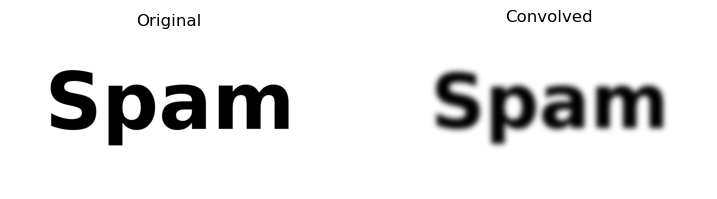

In [6]:
fig, ax = plt.subplots(1,2,figsize=(9,3))
ax[0].imshow(im,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(im_blur,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Convolved')
plt.show()

Here's all the code we used to blur

```
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# Function for creating gaussian filters
def make_gaussian_filter(l=5, σ=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `σ`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * ax**2 / σ**2 )
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

# Get image
im = plt.imread('./figs/spam.png').mean(2)

# Make our particular filter
filt = make_gaussian_filter(80,15)

# Convolve
im_blur = convolve2d(im,filt,fillvalue=1)
```

#### Sliding averages, de-noising

In the previous example of [image blurring](ex-image-blurring), we showed how convolution with a blurring filter can be understood of as a form of data *noising* or *corruption*. It might be surprising to learn, then, that the reverse process - *denoising* - can often also be carried out by a convolution. 

Consider what you'd do if you were given the following noisy recording of neural activity during a task

In [7]:
np.random.seed(4)
t = np.linspace(0,1,10001)
s = np.exp(-(t-0.5)**2/2/0.1**2)
s = np.diff(s)
s /= s.std()
s += 2*np.random.randn(len(s))
np.save('./data/noisy_1d_signal_t.npy',t[:-1])
np.save('./data/noisy_1d_signal.npy',s)

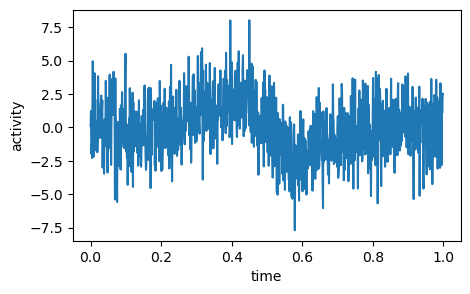

In [8]:
ts = np.load('./data/noisy_1d_signal_t.npy')
signal = np.load('./data/noisy_1d_signal.npy')

plt.figure(figsize=(5,3))
# plt.figure(figsize=(10,6))

plt.plot(ts[::10],signal[::10])
plt.xlabel('time')
plt.ylabel('activity')
plt.show()

If you were interested in the underlying activity profile, a reasonable thing to do is to try to clamp down on the noise by taking sliding averages of the signal. This is a convolution! To see this, consider what you do when you take the average of of set of values. Let's suppose these values are stored as the components of a vector $x_1,x_2,\ldots,x_n$. The average is then just

```{math}
\text{Average}=\frac{1}{n} \sum_{i=1}^{n} x_i =  \sum_{i=1}^{n} \left(\frac{1}{n}1\right)(x_i) = \left(\frac{1}{n}\vec{1}\right)\cdot \vec{x},
```

where $\vec{1}$ is just the vector whose components are all $1$. Thus we've managed to write the process of taking an average as a dot product. A sliding average is then just a [sliding dot product](sum-conv-interp) - a convolution! 

Let's compute a sliding average of $n=1000$ values by creating a filter with the values $\frac{1}{1000}$ and convolving with the signal. 

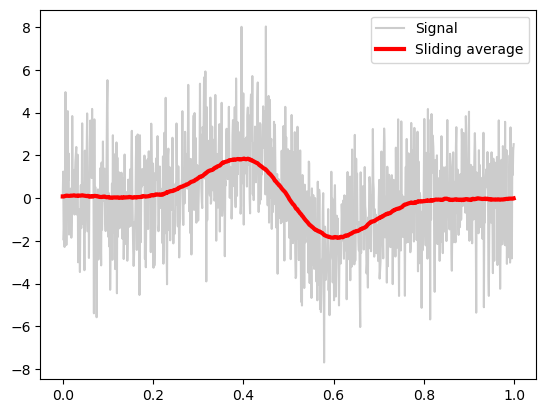

In [9]:
n = 1000 # how many points to average

# Make filter 
average_filter = np.ones(n)/n 

# Compute sliding averages
signal_av = np.convolve(signal,average_filter,'same')

plt.figure()
plt.plot(ts[::10],signal[::10],c=np.array([0.8,0.8,0.8]))
plt.plot(ts[::10],signal_av[::10],'r',linewidth=3)
plt.legend(['Signal','Sliding average'])
plt.show()

Voila! We've denoised by convolving with an avereging filter. 

#### Extracting spikes

A common application for denoising or signal processing in neuroscience is to extract neural spikes from a recording. Suppose we're given the following signal consisting of spikes on top of a slowly-varying background voltage. 

In [10]:
np.random.seed(10)
n_points = 1000
slow_mask = np.zeros(n_points)
w = 30
slow_mask[:w] = 1
slow_mask[-w:] = 1
slow = np.real(np.fft.ifft(slow_mask*np.fft.fft(np.random.randn(n_points))))

fast_template = np.zeros(n_points)
fast_template[0] = 1
fast = np.zeros(n_points)
n_spikes = 10
for i in range(n_spikes):
    shift = np.random.randint(0,high=n_points)
    fast += np.roll(fast_template,shift)
signal = slow+fast

np.save('./data/spike_signal_t.npy',np.linspace(0,1,n_points))
np.save('./data/spike_signal.npy',signal)

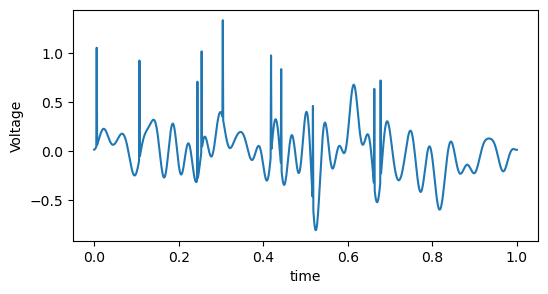

In [11]:
ts = np.load('./data/spike_signal_t.npy')
signal = np.load('./data/spike_signal.npy')

plt.figure(figsize=(6,3))
plt.plot(ts,signal)
plt.xlabel('time')
plt.ylabel('Voltage')
plt.show()

Intuitively, a spike is an event where the voltage at that time is much larger than before or after. For example, the following snippet of $3$ times could represent a spike:

```{math}
\ldots,0,1.1,0.2,\ldots
```

It stands to reason that such events should have a large dot product with a vector like $-1,2,-1$, which adds the maximum part of the spike and subtracts the low part of the spike on either side. Furthermore, the dot product of this vector with any snippet where the voltage isn't changing is exactly $0$:

```{math}
\left(\begin{array}{c}
-1\\
2\\
-1
\end{array}\right)\cdot\left(\begin{array}{c}
\vdots\\
x\\
x\\
x\\
\vdots
\end{array}\right)=-x+2x-x=0.
```

So this seems like a good candidate for a spike-detecting filter. Let's compute the sliding dot-product of our signal with this filter - ie. let's convolve:

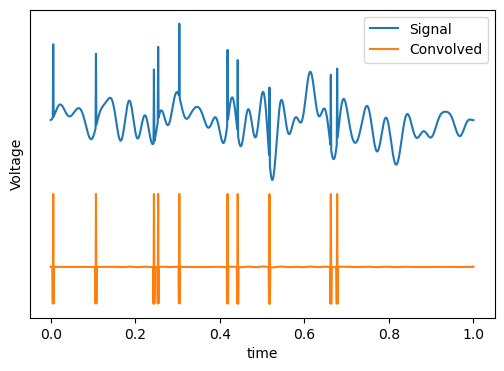

In [12]:
# Make filter
filt = np.array([-1,2,-1])

# Convolve
signal_filt = np.convolve(signal,filt,mode='same')

plt.figure(figsize=(6,4))
plt.plot(ts,signal)
plt.plot(ts,signal_filt/2-2)
plt.xlabel('time')
plt.yticks([])
plt.ylabel('Voltage')
plt.legend(['Signal','Convolved'])
plt.show()

The convolution has managed to subtract away almost all of the background variation, leaving just the spikes. This example was slightly contrived, as our ability to use the filter $(-1,2,-1)$ depended on the spiking events being just $1$ timepoint wide. Further on, we will discuss how Fourier analysis gives a systematic approach for designing filters that extract different components of a signal. 